## Computer Vision Project - Group 10
#### Daniel Astorino 260799820
#### Murray
#### Julianna Tchebotareva 260761726
#### Tyler Young 260730324 

In [1]:
# import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [2]:
class_trainingimgs = []
fileNames = glob.glob("./flower_classification/training/*.jpg")

for i in fileNames:
    #print(i)
    image = cv2.imread(i)
    class_trainingimgs.append(image)

#this takes some time to import all 6000 photos

In [3]:
# we will resize the 6000 images or else it will be tedious to work with

resizeClassification = []

for i in class_trainingimgs:

    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(i, (128, 128),interpolation=cv2.INTER_AREA)
    resizeClassification.append(pic)
    #plt.figure()
    #plt.imshow(pic)
    #plt.show()

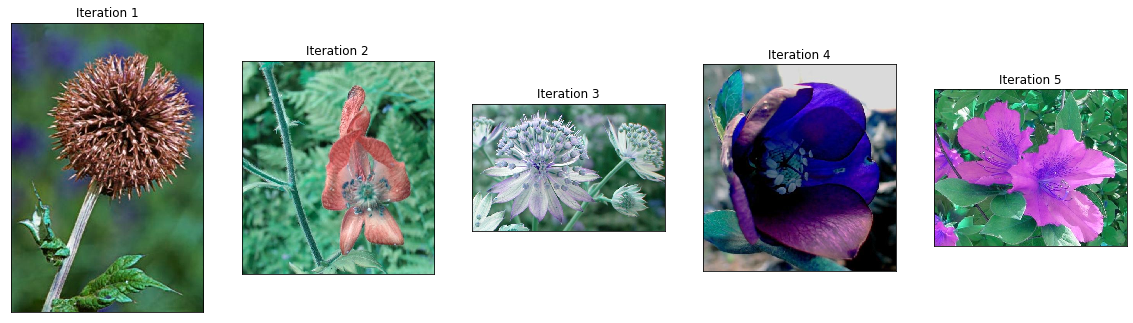

In [4]:
#function to plot 5 images at a time
def plot(segImgs):    
    plt.figure(figsize=(20,20))
    for i in range(5):
        plt.subplot(151 + i)
        plt.imshow(segImgs[i])
        plt.title("Iteration " + str(i+1)), plt.xticks([]), plt.yticks([])
        


plot(class_trainingimgs)

In [8]:
# now to want to perform feature extraction for the resized images

# we will make a copy of the array  
classificationPhotos = resizeClassification.copy()

allKeypoints = []
allDescriptors = []

for img in classificationPhotos:

    # create a SIFT object
    sift_obj = cv2.xfeatures2d.SIFT_create()

    # Compute keypoints and descriptors
    keypoints, descriptors = sift_obj.detectAndCompute(img ,None)
    
    allKeypoints.append(keypoints)
    allDescriptors.append(descriptors)

# we will find the SIFT features for each and keep only the good features
# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))
print('Num keypoints: '+ str(len(allKeypoints)))
print('Num descriptors: '+ str(len(descriptors)))
print('Num descriptors: '+ str(len(allDescriptors)))

Num keypoints: 230
Num keypoints: 6000
Num descriptors: 230
Num descriptors: 6000


train a Support Vector Machine (SVM) classifier using your computed features and the ground truth labels. Optimize the hyperparame- ters (e.g., number of features, thresholds, SVM kernel, etc.) for the feature extraction stage and for the SVM classifier. Repeat using a different (non-deep learning) classifier of your choice.